In [29]:
import pandas as pd

# Memuat data dari file CSV
file_path = 'C:\\Users\\weird\\Downloads\\Dataset Data mining\\penjualan_mainan.csv'
df = pd.read_csv(file_path)

# Menampilkan nama-nama kolom untuk memeriksa nama yang benar
print(df.columns)


Index(['ID_Penjualan', 'Nama_Mainan', 'Kategori', 'Tanggal_Penjualan', 'Harga',
       'Jumlah_Terjual'],
      dtype='object')


In [30]:
# Memeriksa nilai yang hilang dan tipe data kolom
print(df.isnull().sum())
print(df.dtypes)


ID_Penjualan         0
Nama_Mainan          0
Kategori             0
Tanggal_Penjualan    0
Harga                0
Jumlah_Terjual       0
dtype: int64
ID_Penjualan         object
Nama_Mainan          object
Kategori             object
Tanggal_Penjualan    object
Harga                 int64
Jumlah_Terjual        int64
dtype: object


In [31]:
# Menghapus baris duplikat
df.drop_duplicates(inplace=True)


In [32]:
# Statistik deskriptif dari data
print(df.describe(include='all'))


       ID_Penjualan    Nama_Mainan         Kategori Tanggal_Penjualan  \
count          1000           1000             1000              1000   
unique         1000            100                5               474   
top           JFTBP  Wonder Animal  Mainan Binatang        2023-11-05   
freq              1             18              212                 6   
mean            NaN            NaN              NaN               NaN   
std             NaN            NaN              NaN               NaN   
min             NaN            NaN              NaN               NaN   
25%             NaN            NaN              NaN               NaN   
50%             NaN            NaN              NaN               NaN   
75%             NaN            NaN              NaN               NaN   
max             NaN            NaN              NaN               NaN   

                Harga  Jumlah_Terjual  
count     1000.000000     1000.000000  
unique            NaN             NaN  
top

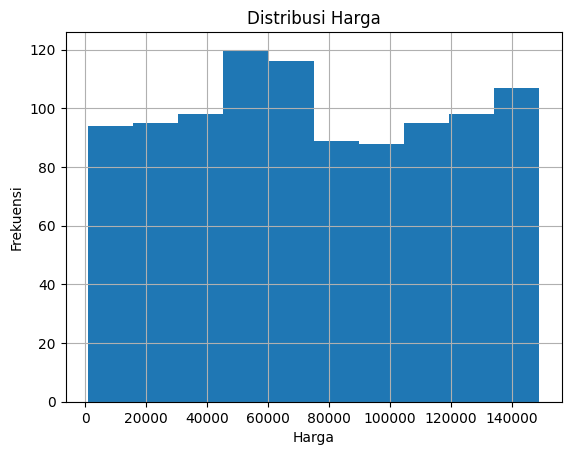

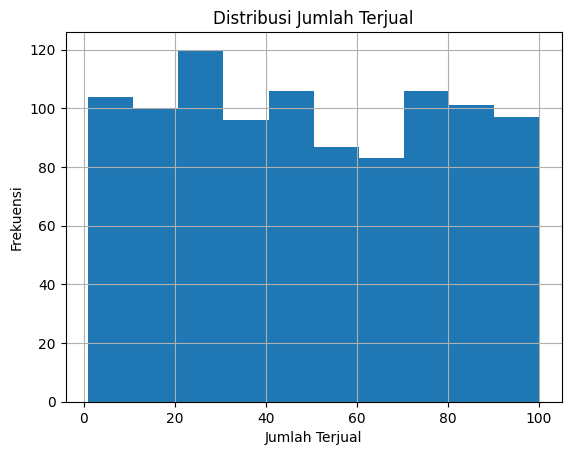

In [33]:
import matplotlib.pyplot as plt

# Histogram untuk kolom Harga
if 'Harga' in df.columns:
    df['Harga'].hist()
    plt.title('Distribusi Harga')
    plt.xlabel('Harga')
    plt.ylabel('Frekuensi')
    plt.show()
else:
    print("Kolom 'Harga' tidak ditemukan.")

# Histogram untuk kolom Jumlah Terjual
if 'Jumlah_Terjual' in df.columns:
    df['Jumlah_Terjual'].hist()
    plt.title('Distribusi Jumlah Terjual')
    plt.xlabel('Jumlah Terjual')
    plt.ylabel('Frekuensi')
    plt.show()
else:
    print("Kolom 'Jumlah_Terjual' tidak ditemukan.")


                   Harga  Jumlah_Terjual
Harga           1.000000        0.002748
Jumlah_Terjual  0.002748        1.000000


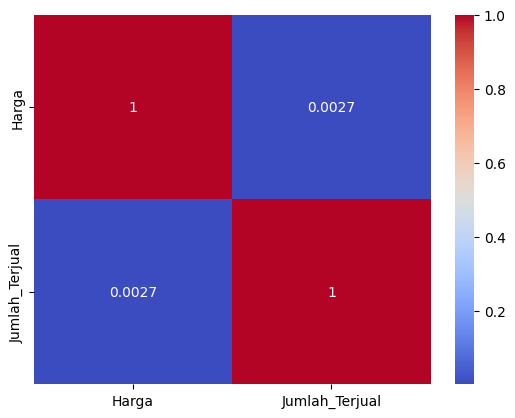

In [34]:
import seaborn as sns

# Matriks korelasi
correlation_matrix = df[['Harga', 'Jumlah_Terjual']].corr()
print(correlation_matrix)

# Visualisasi matriks korelasi
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [37]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur dan target
X = df[['Harga']]  # Fitur
y = df['Jumlah_Terjual']  # Target

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [38]:
from sklearn.linear_model import LinearRegression

# Membuat model regresi linier
model = LinearRegression()

# Melatih model dengan data latih
model.fit(X_train, y_train)


LinearRegression()

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

# Memprediksi hasil dengan data uji
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error (MSE): 827.2204282842656
R^2 Score: -0.00726367274220352


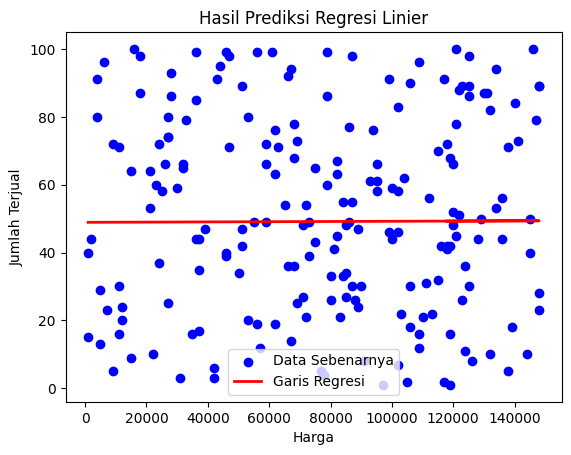

In [40]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Data Sebenarnya')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Garis Regresi')
plt.title('Hasil Prediksi Regresi Linier')
plt.xlabel('Harga')
plt.ylabel('Jumlah Terjual')
plt.legend()
plt.show()
